In [45]:
import json
import pandas as pd
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format

def extract_benchmark_method(benchmark):
    return benchmark.split('.')[-1]

def load_results(profile, benchmark):
    with open(f'results/{profile}/{benchmark}.json') as file:
        results = json.load(file)
        scores_raw = [(extract_benchmark_method(i['benchmark']),i['params']['size'],i['primaryMetric']['score']) for i in results]
        scores = pd.DataFrame(data=scores_raw,columns=['benchmark','size','score'])
        max_scores_by_size = scores.groupby(['size']).max()
        scores_pct = scores.join(max_scores_by_size,on='size',rsuffix='_max').drop(columns='benchmark_max')
        scores_pct['score_pct'] = scores_pct['score'].divide(scores_pct['score_max']).multiply(100)
        labels = {'score_pct':'Score %','benchmark':'Benchmark','size':'Items count'}
        chart = px.bar(data_frame = scores_pct,x = 'size', y='score_pct', color='benchmark',barmode='group', labels = labels)
        chart.update_layout(legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='left',x=0.01))
        chart.update_layout({'plot_bgcolor':'rgba(0, 0, 0, 0)'})

        return (scores_pct, chart)

def write_chart(chart, profile,file_name):
    chart.write_image(f'img/{profile}/{benchmark}.png',width='700')

    return chart

# Default JVM settings

In [46]:
profile='default'

## Integers sum

In [47]:
benchmark = 'benchmark-streams-sum-int'
(scores,chart) = load_results(profile, benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"428,162.30","1,890,842.34",22.64
1,collect,10000,"27,934.15","173,596.00",16.09
2,collect,100000,"2,767.23","16,548.18",16.72
3,collect,1000000,229.15,"1,042.59",21.98
4,collectPar,1000,"158,711.34","1,890,842.34",8.39
5,collectPar,10000,"30,417.95","173,596.00",17.52
6,collectPar,100000,"9,088.54","16,548.18",54.92
7,collectPar,1000000,911.97,"1,042.59",87.47
8,forEach,1000,"1,890,842.34","1,890,842.34",100.00
9,forEach,10000,"173,596.00","173,596.00",100.00


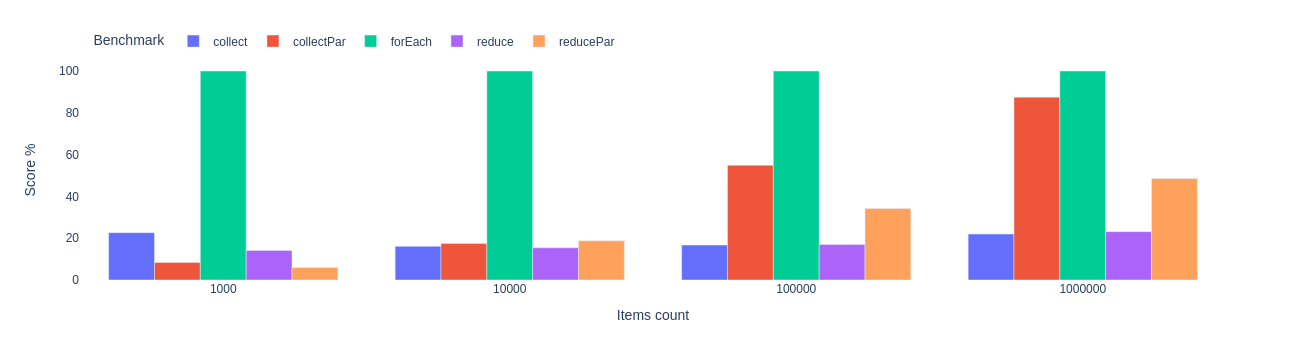

In [48]:
write_chart(chart,profile,benchmark)

## Doubles calculation

In [49]:
benchmark = 'benchmark-streams-sum-double-calculation'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"34,388.02","45,503.55",75.57
1,collect,10000,"3,230.12","8,465.82",38.15
2,collect,100000,326.51,"1,241.80",26.29
3,collect,1000000,34.13,134.11,25.45
4,collectPar,1000,"45,503.55","45,503.55",100.00
5,collectPar,10000,"7,519.17","8,465.82",88.82
6,collectPar,100000,"1,235.68","1,241.80",99.51
7,collectPar,1000000,125.51,134.11,93.59
8,forEach,1000,"35,553.42","45,503.55",78.13
9,forEach,10000,"3,599.89","8,465.82",42.52


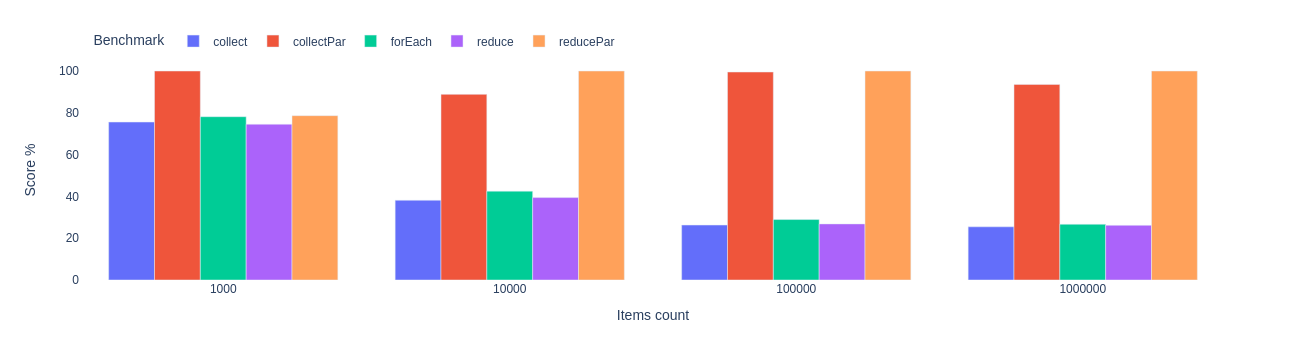

In [50]:
write_chart(chart,profile,benchmark)

## Grouping

In [51]:
benchmark = 'benchmark-streams-group'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"53,864.12","84,298.37",63.90
1,collect,10000,"5,374.85","9,008.90",59.66
2,collect,100000,510.69,"1,330.62",38.38
3,collect,1000000,31.15,73.16,42.58
4,collectLinked,1000,"57,323.48","84,298.37",68.00
5,collectLinked,10000,"5,873.58","9,008.90",65.20
6,collectLinked,100000,561.29,"1,330.62",42.18
7,collectLinked,1000000,51.49,73.16,70.37
8,collectPar,1000,"21,819.34","84,298.37",25.88
9,collectPar,10000,"9,008.90","9,008.90",100.00


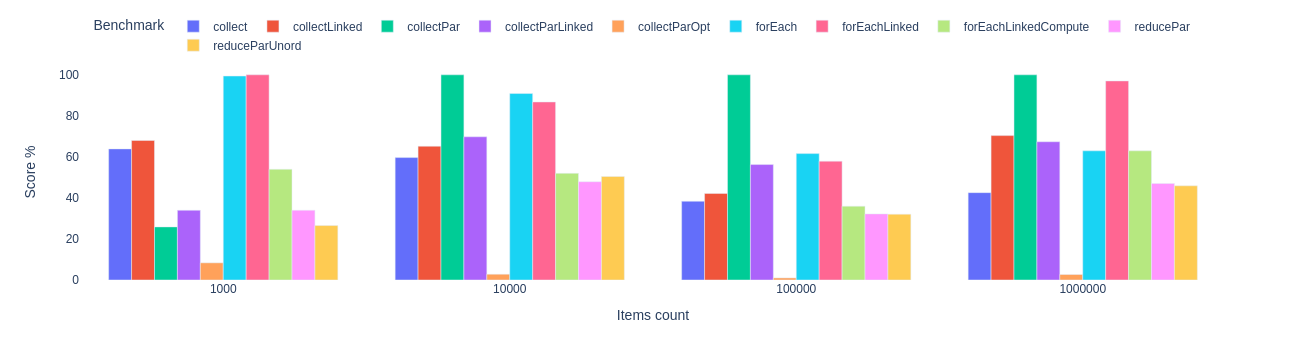

In [52]:
write_chart(chart,profile,benchmark)

## Filtering and sorting distinct items

In [53]:
benchmark = 'benchmark-streams-filter-sort-distinct'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"39,934.45","39,934.45",100.00
1,collect,10000,"6,844.77","6,844.77",100.00
2,collect,100000,806.43,"1,767.87",45.62
3,collect,1000000,83.73,289.83,28.89
4,collectPar,1000,"11,619.90","39,934.45",29.10
5,collectPar,10000,"4,607.16","6,844.77",67.31
6,collectPar,100000,"1,767.87","1,767.87",100.00
7,collectPar,1000000,289.83,289.83,100.00
8,forEach,1000,"39,884.12","39,934.45",99.87
9,forEach,10000,"6,141.59","6,844.77",89.73


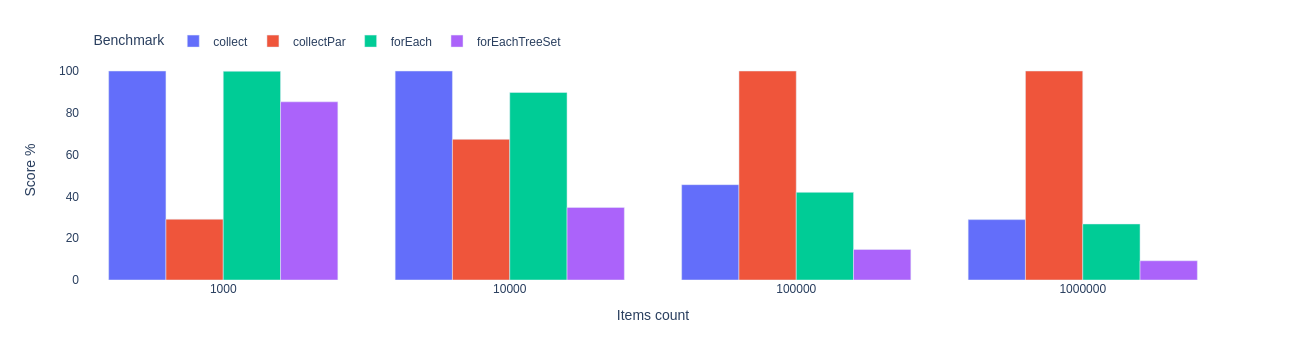

In [54]:
write_chart(chart,profile,benchmark)

# Disabled JIT

In [55]:
profile='nojit'

## Integers sum

In [56]:
benchmark = 'benchmark-streams-sum-int'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"7,719.32","9,410.73",82.03
1,collect,10000,839.79,"2,231.07",37.64
2,collect,100000,80.69,275.20,29.32
3,collect,1000000,8.46,27.28,31.01
4,collectPar,1000,"9,410.73","9,410.73",100.00
5,collectPar,10000,"2,231.07","2,231.07",100.00
6,collectPar,100000,275.20,275.20,100.00
7,collectPar,1000000,27.28,27.28,100.00
8,forEach,1000,"8,471.41","9,410.73",90.02
9,forEach,10000,847.76,"2,231.07",38.00


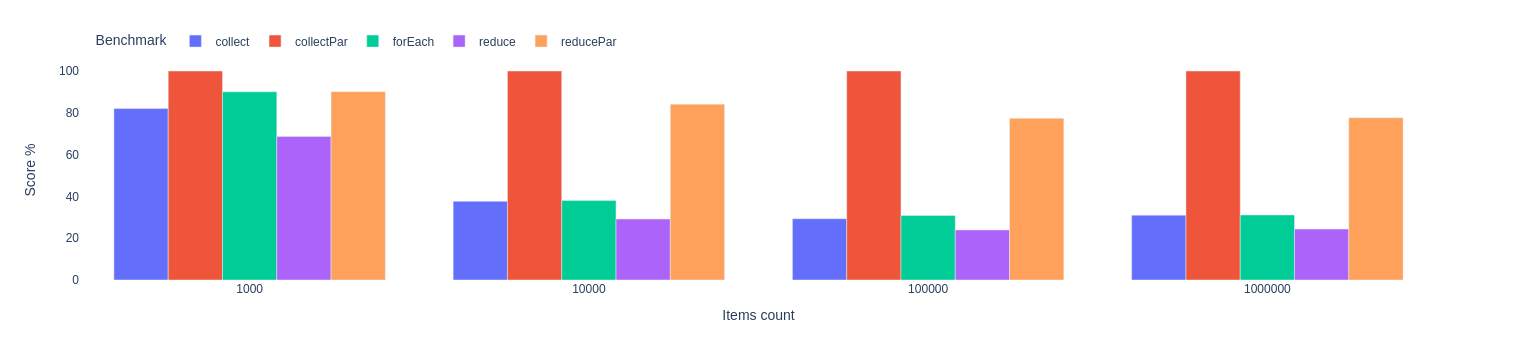

In [57]:
write_chart(chart,profile,benchmark)

## Doubles calculation

In [58]:
benchmark = 'benchmark-streams-sum-double-calculation'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"2,786.68","5,185.62",53.74
1,collect,10000,297.70,934.67,31.85
2,collect,100000,28.84,101.41,28.44
3,collect,1000000,2.90,9.75,29.70
4,collectPar,1000,"4,571.60","5,185.62",88.16
5,collectPar,10000,916.99,934.67,98.11
6,collectPar,100000,101.10,101.41,99.70
7,collectPar,1000000,9.75,9.75,100.00
8,forEach,1000,"4,199.25","5,185.62",80.98
9,forEach,10000,428.79,934.67,45.88


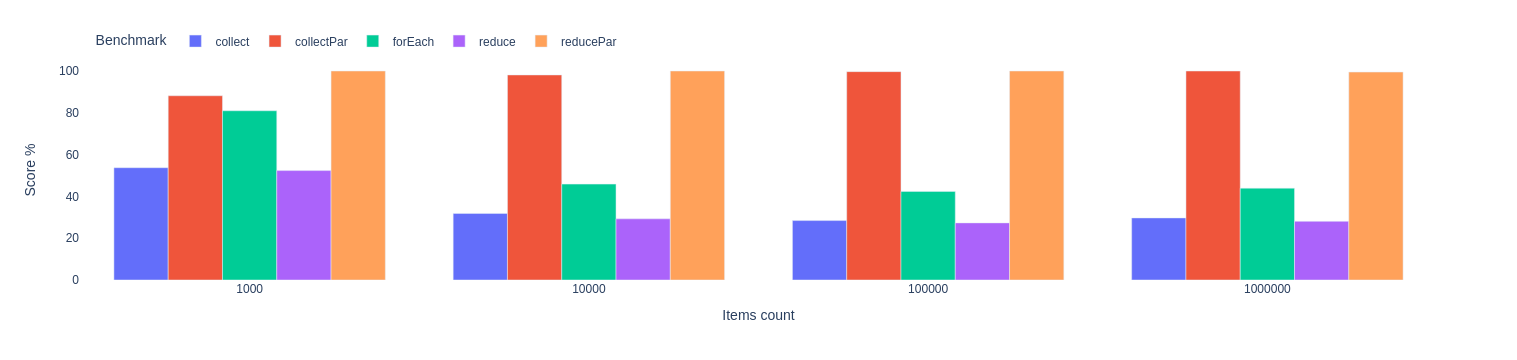

In [59]:
write_chart(chart,profile,benchmark)

## Grouping

In [60]:
benchmark = 'benchmark-streams-group'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"1,115.98","2,504.88",44.55
1,collect,10000,112.24,390.85,28.72
2,collect,100000,11.51,40.80,28.20
3,collect,1000000,1.13,4.13,27.51
4,collectLinked,1000,"1,094.99","2,504.88",43.71
5,collectLinked,10000,108.42,390.85,27.74
6,collectLinked,100000,10.95,40.80,26.84
7,collectLinked,1000000,1.09,4.13,26.44
8,collectPar,1000,"2,504.88","2,504.88",100.00
9,collectPar,10000,390.85,390.85,100.00


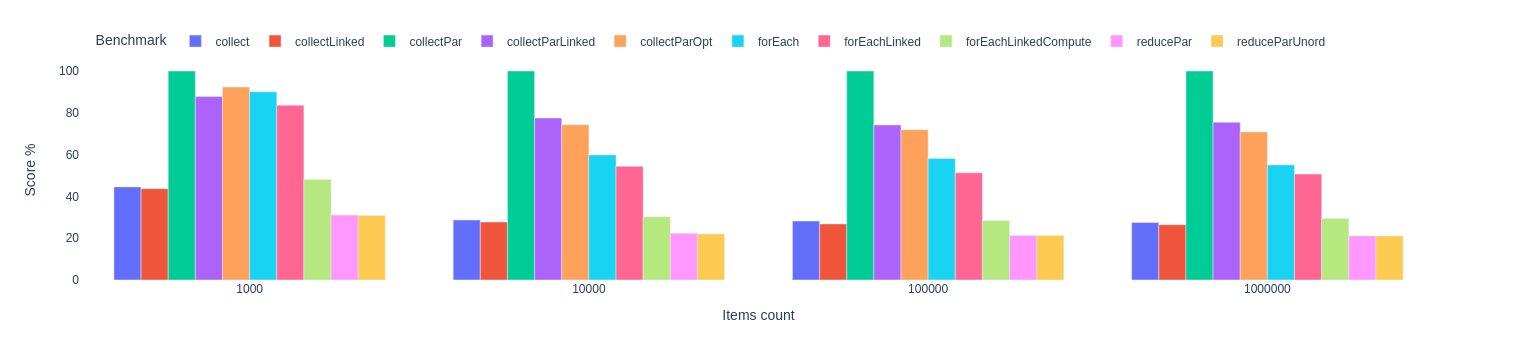

In [61]:
write_chart(chart,profile,benchmark)

## Filtering and sorting distinct items

In [63]:
benchmark = 'benchmark-streams-filter-sort-distinct'
(scores,chart) = load_results(profile,benchmark)
scores

,benchmark,size,score,score_max,score_pct
0,collect,1000,"1,321.03","1,674.39",78.90
1,collect,10000,267.93,392.56,68.25
2,collect,100000,31.30,89.45,34.99
3,collect,1000000,3.13,10.35,30.21
4,collectPar,1000,950.47,"1,674.39",56.77
5,collectPar,10000,392.56,392.56,100.00
6,collectPar,100000,89.45,89.45,100.00
7,collectPar,1000000,10.35,10.35,100.00
8,forEach,1000,"1,674.39","1,674.39",100.00
9,forEach,10000,284.36,392.56,72.44


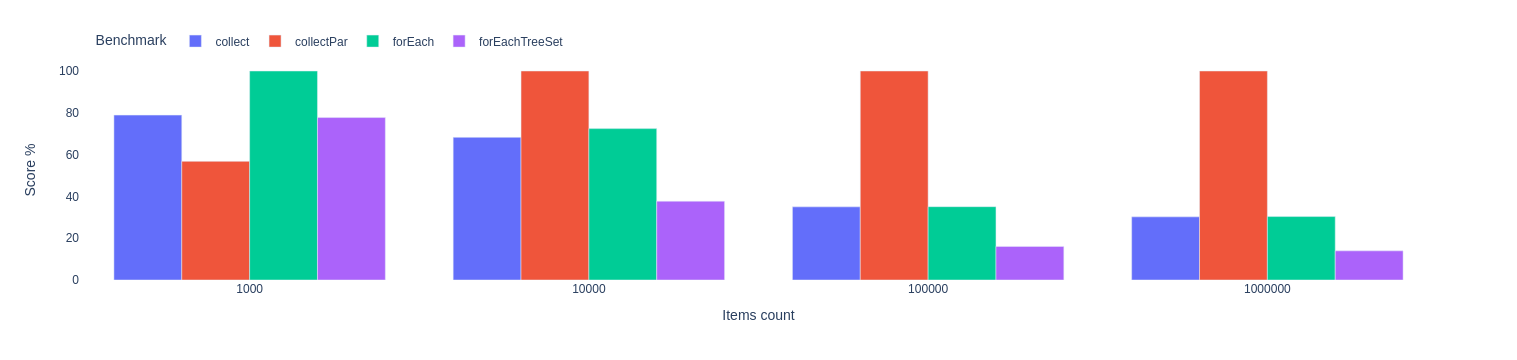

In [64]:
write_chart(chart,profile,benchmark)